### 1. 1호선만 시각화

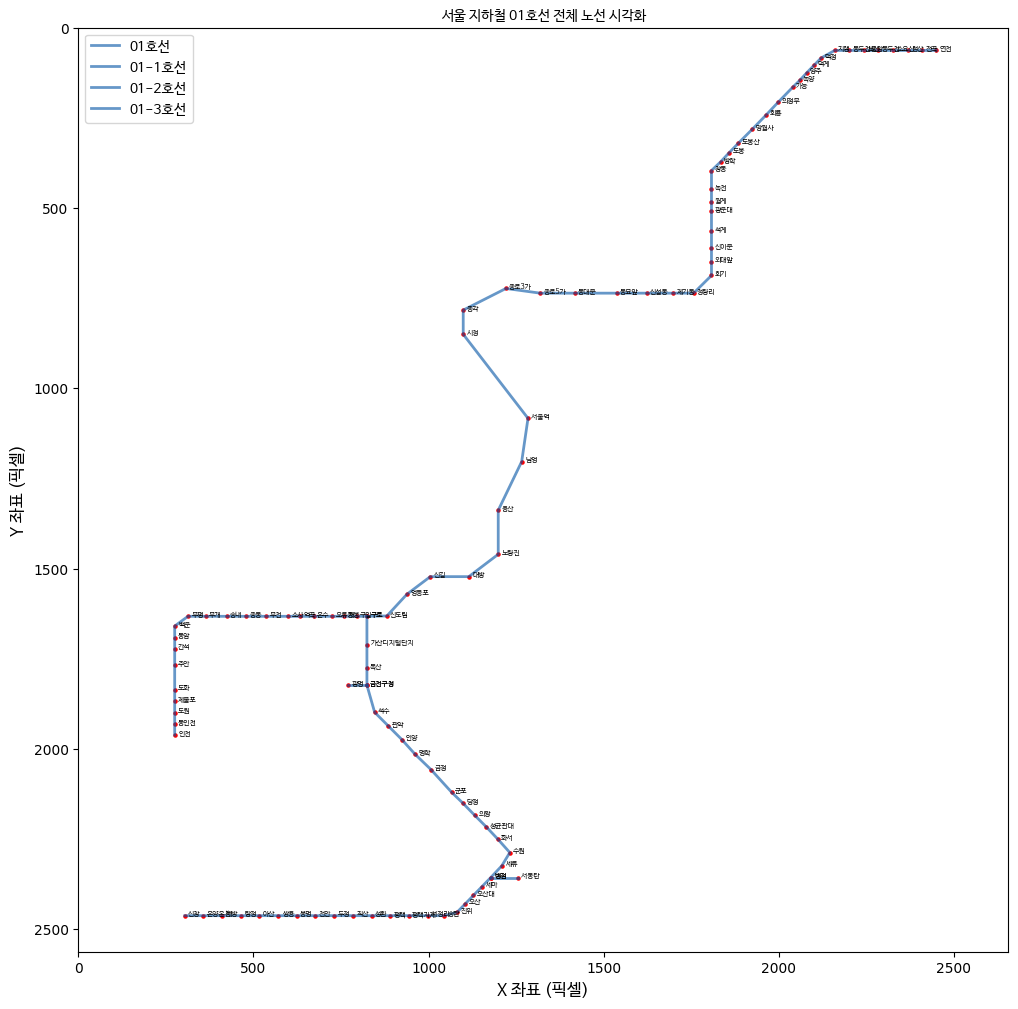

In [23]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 폰트 설정
font_path = "/root/Metro_Visualization/NanumBarunGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 이미지 크기 설정
image_width = 2656
image_height = 2562

# 역 데이터 로드
file_path = "/root/Metro_Visualization/좌표/1호선.txt"
with open(file_path, "r", encoding="utf-8") as file:
    stations = eval(file.read())

# 색상 매핑 (01로 시작하는 노선들은 같은 색상)
line_colors = {}
default_colors = ['#0052A4']
color_index = 0

for station in stations:
    root_line = station["노선명"].split('-')[0]
    if root_line not in line_colors:
        line_colors[root_line] = default_colors[color_index % len(default_colors)]
        color_index += 1

# 역 데이터를 노선별로 그룹화
grouped_stations = {}
for station in stations:
    line_name = station["노선명"]
    if line_name not in grouped_stations:
        grouped_stations[line_name] = []
    grouped_stations[line_name].append(station)

# 외부역코드 정렬을 위한 키 함수
def sort_key(station):
    code = station["외부역코드"]
    if isinstance(code, str):
        # 문자열인 경우 "-"로 나누어 처리
        parts = code.split('-')
        main_code = int(parts[0][1:])  # "P144" -> 144
        sub_code = int(parts[1]) if len(parts) > 1 else 0  # 가지 번호
    else:
        main_code = code  # 숫자인 경우 그대로 사용
        sub_code = 0
    return (main_code, sub_code)

# 각 노선을 외부역코드 기준으로 정렬
for line in grouped_stations:
    grouped_stations[line] = sorted(grouped_stations[line], key=sort_key)

# 캔버스 준비
plt.figure(figsize=(12, 12))
plt.xlim(0, image_width)
plt.ylim(image_height, 0)  # y축 뒤집기

# 선 연결 및 표시
for line, stations in grouped_stations.items():
    root_line = line.split('-')[0]
    color = line_colors[root_line]
    x_coords = [station["x좌표"] for station in stations]
    y_coords = [station["y좌표"] for station in stations]
    plt.plot(x_coords, y_coords, color=color, linewidth=2, alpha=0.6, label=line)

    # 역 이름 및 점 표시
    for station in stations:
        plt.scatter(station["x좌표"], station["y좌표"], color="red", s=5)
        plt.text(
            station["x좌표"] + 10,
            station["y좌표"],
            station["역이름"],
            fontsize=5,
            color="black",
            fontproperties=font_prop,
        )

# 제목과 레이블 설정
plt.title("서울 지하철 01호선 전체 노선 시각화", fontsize=16, fontproperties=font_prop)
plt.xlabel("X 좌표 (픽셀)", fontsize=12, fontproperties=font_prop)
plt.ylabel("Y 좌표 (픽셀)", fontsize=12, fontproperties=font_prop)
plt.legend(loc="upper left", fontsize=10, prop=font_prop)
plt.grid(False)

# 이미지 저장 및 표시
output_path = "/root/Metro_Visualization/01호선_노선도.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=False)
plt.show()

### 2-1. 전체 시각화(점색깔: 검정)

/tmp/ipykernel_132/1939567594.py:122: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left", fontsize=8, prop=font_prop)


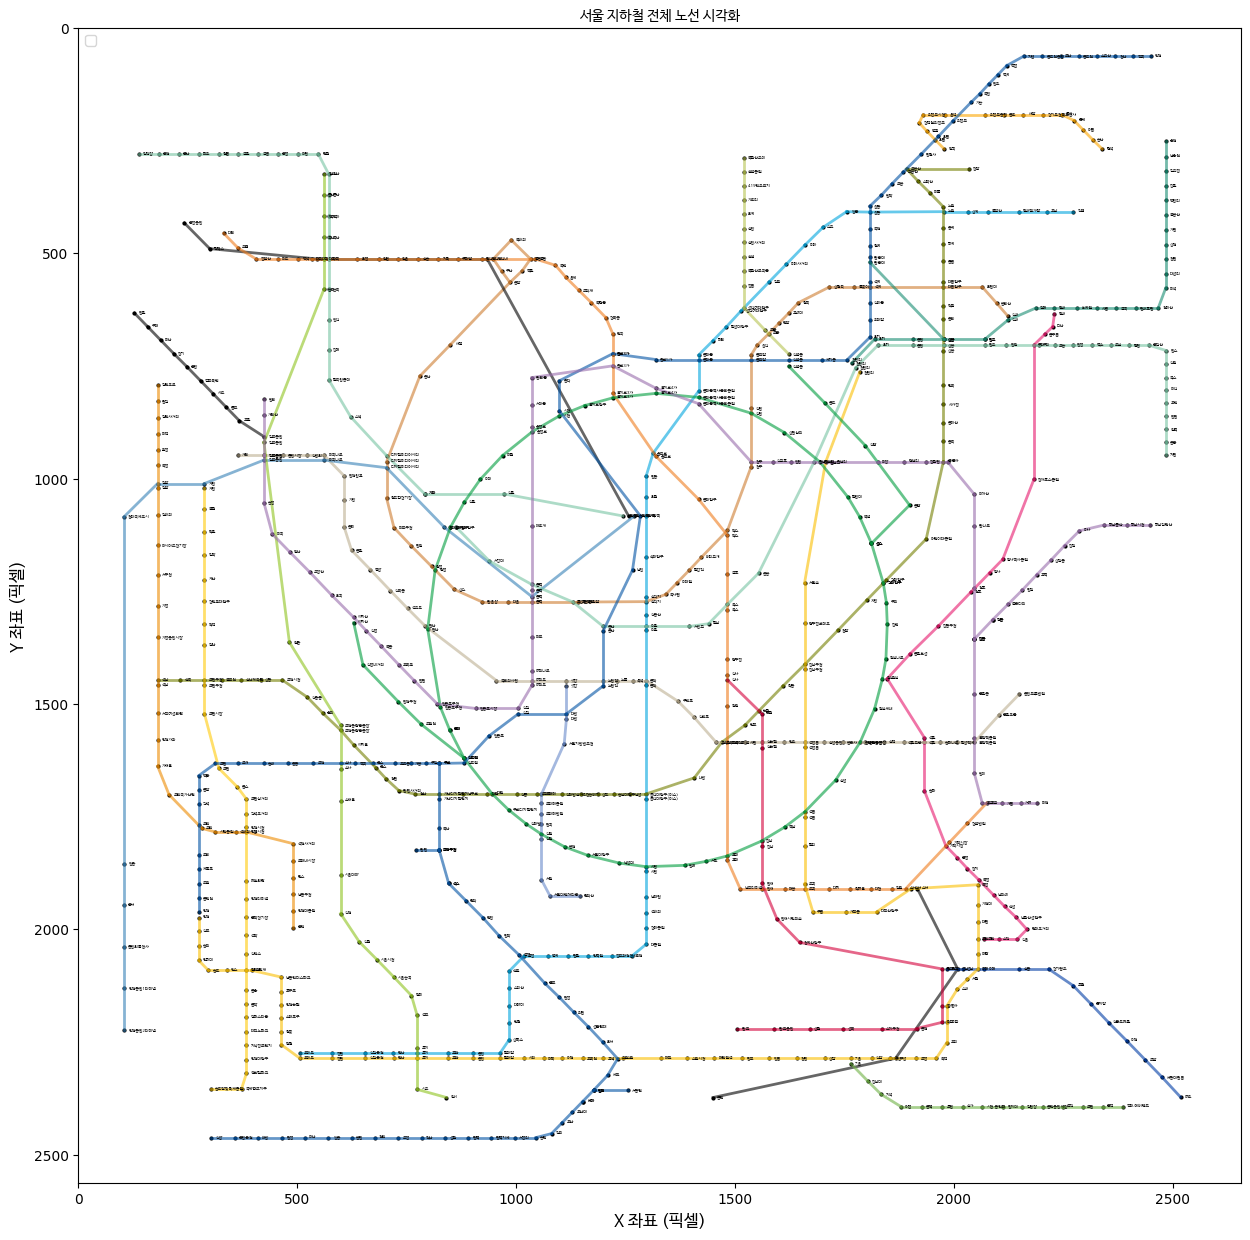

In [14]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import os

# 폰트 설정
font_path = "/root/Metro_Visualization/NanumBarunGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 이미지 크기 설정
image_width = 2656
image_height = 2562

# 노선 색상 매핑
line_colors = {
    "1호선": "#0052A4", "2호선": "#009D3E", "3호선": "#EF7C1C", "4호선": "#00A5DE",
    "5호선": "#996CAC", "6호선": "#CD7C2F", "7호선": "#747F00", "8호선": "#E6186C",
    "9호선": "#BDB092", "경의선": "#77C4A3", "신분당선": "#D4003B", "수인분당선": "#FABE00",
    "공항철도": "#3681B7", "인천1호선": "#FFCA08", "인천2호선": "#ED8B00",
    "의정부경전철": "#FDA600", "용인경전철": "#6FB245", "우이신설경전철": "#B7C452",
    "경춘선": "#178C72", "경강선": "#003DA5", "서해선": "#8FC31F", "신림선": "#6789CA",
    "01-1호선": "#0052A4", "01-2호선": "#0052A4", "01-3호선": "#0052A4", "01-4호선": "#0052A4", "01-5호선": "#0052A4",
    "02-1호선": "#009D3E", "02-2호선": "#009D3E", "02-3호선": "#009D3E", "02-4호선": "#009D3E",
    "05-1호선": "#996CAC", "05-2호선": "#996CAC",
    "경의선-1호선": "#77C4A3", 
    "경춘선-1호선": "#178C72", "경춘선-2호선": "#178C72",
    "GTX-A": "#9A6292", "GTX-A-1": "#9A6292"
}

# 좌표 파일 경로 설정
coordinates_folder = "/root/Metro_Visualization/좌표"
files = [f for f in os.listdir(coordinates_folder) if f.endswith(".txt")]

# 역 데이터 로드 및 그룹화
grouped_stations = {}
for file_name in files:
    line_name = file_name.replace(".txt", "")
    file_path = os.path.join(coordinates_folder, file_name)
    with open(file_path, "r", encoding="utf-8") as file:
        stations = eval(file.read())
        grouped_stations[line_name] = stations

# 외부역코드 정렬을 위한 키 함수
def sort_key(station):
    code = station["외부역코드"]
    if isinstance(code, str):
        parts = code.split('-')
        if not parts[0][0].isdigit():
            main_code = (parts[0][0], int(parts[0][1:]))
        else:
            main_code = ("", int(parts[0]))
        sub_code = int(parts[1]) if len(parts) > 1 else -1
    else:
        main_code = ("", code)
        sub_code = -9
    return (main_code, sub_code)

# 각 노선을 노선명으로 먼저 그룹화하고, 외부역코드 기준으로 정렬
grouped_sorted_stations = {}
for line in grouped_stations:
    grouped_sorted_stations[line] = sorted(grouped_stations[line], key=sort_key)

grouped_stations = grouped_sorted_stations

# 캔버스 준비
plt.figure(figsize=(15, 15))
plt.xlim(0, image_width)
plt.ylim(image_height, 0)  # y축 뒤집기

displayed_coordinates = set()
for line, stations in grouped_stations.items():
    color = line_colors.get(line, "#000000")  # 기존 노선명 그대로 적용

    # 동일한 노선 내의 모든 역을 연결 (서브 노선 포함)
    for i in range(len(stations) - 1):
        station_a = stations[i]
        station_b = stations[i + 1]

        # 같은 서브 노선에 속한 역만 연결
        if station_a["노선명"] == station_b["노선명"]:
            plt.plot(
                [station_a["x좌표"], station_b["x좌표"]],
                [station_a["y좌표"], station_b["y좌표"]],
                color=color, linewidth=2, alpha=0.6
            )

    # 동일 좌표 처리 개선: 같은 좌표라도 같은 서브 노선명이면 연결
    for i in range(len(stations)):
        for j in range(i + 1, len(stations)):
            station_a = stations[i]
            station_b = stations[j]
            if (
                station_a["x좌표"] == station_b["x좌표"] and
                station_a["y좌표"] == station_b["y좌표"] and
                station_a["노선명"] == station_b["노선명"]
            ):
                plt.plot(
                    [station_a["x좌표"], station_b["x좌표"]],
                    [station_a["y좌표"], station_b["y좌표"]],
                    color=color, linewidth=2, alpha=0.6
                )

    # 역 이름 및 점 표시
    for station in stations:
        coord = (station["x좌표"], station["y좌표"])
        if (coord, station["노선명"]) not in displayed_coordinates:
            plt.scatter(station["x좌표"], station["y좌표"], color="black", s=4)
            plt.text(
                station["x좌표"] + 10,
                station["y좌표"],
                station["역이름"],
                fontsize=3,
                color="black",
                fontproperties=font_prop,
            )
            displayed_coordinates.add((coord, station["노선명"]))

# 제목과 레이블 설정
plt.title("서울 지하철 전체 노선 시각화", fontsize=16, fontproperties=font_prop)
plt.xlabel("X 좌표 (픽셀)", fontsize=12, fontproperties=font_prop)
plt.ylabel("Y 좌표 (픽셀)", fontsize=12, fontproperties=font_prop)
plt.legend(loc="upper left", fontsize=8, prop=font_prop)
plt.grid(False)

# 이미지 저장 및 표시
output_path = "/root/Metro_Visualization/전체_노선도.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=False)
plt.show()

### 2-2. 전체 시각화(점 색깔 = 노선 색깔)

/tmp/ipykernel_132/2196119223.py:105: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="center right", fontsize=10, prop=font_prop)


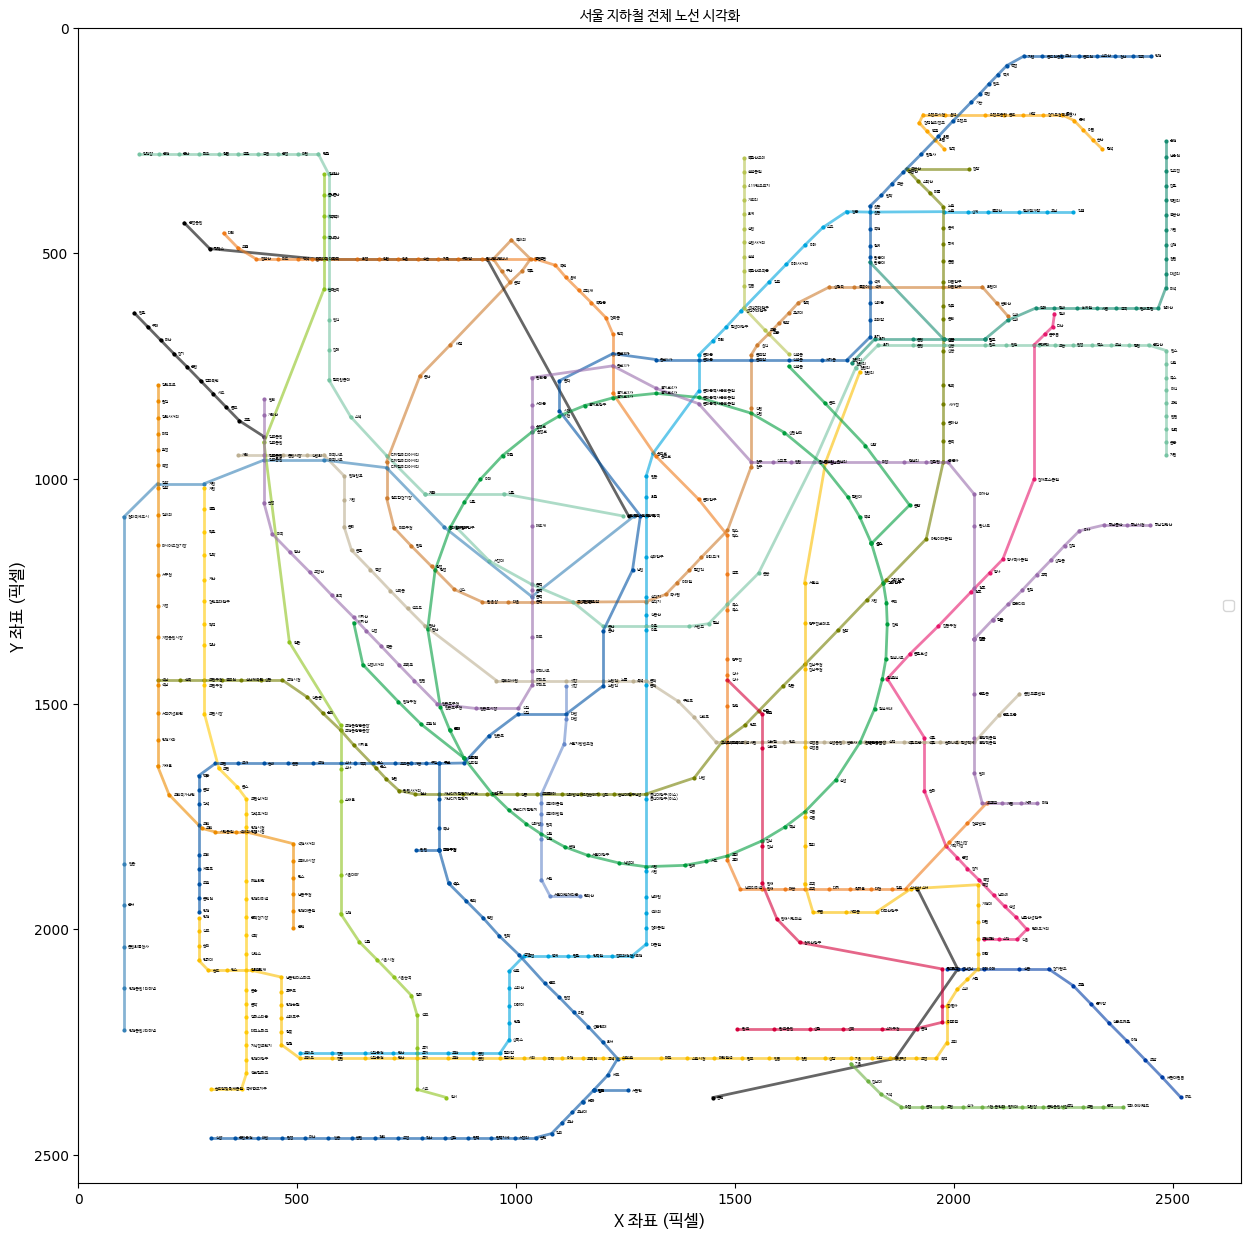

In [33]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import os

# 폰트 설정
font_path = "/root/Metro_Visualization/NanumBarunGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 이미지 크기 설정
image_width = 2656
image_height = 2562

# 노선 색상 매핑
line_colors = {
    "1호선": "#0052A4", "2호선": "#009D3E", "3호선": "#EF7C1C", "4호선": "#00A5DE",
    "5호선": "#996CAC", "6호선": "#CD7C2F", "7호선": "#747F00", "8호선": "#E6186C",
    "9호선": "#BDB092", "경의선": "#77C4A3", "신분당선": "#D4003B", "수인분당선": "#FABE00",
    "공항철도": "#3681B7", "인천1호선": "#FFCA08", "인천2호선": "#ED8B00",
    "의정부경전철": "#FDA600", "용인경전철": "#6FB245", "우이신설경전철": "#B7C452",
    "경춘선": "#178C72", "경강선": "#003DA5", "서해선": "#8FC31F", "신림선": "#6789CA",
    "01-1호선": "#0052A4", "01-2호선": "#0052A4", "01-3호선": "#0052A4", "01-4호선": "#0052A4", "01-5호선": "#0052A4",
    "02-1호선": "#009D3E", "02-2호선": "#009D3E", "02-3호선": "#009D3E", "02-4호선": "#009D3E",
    "05-1호선": "#996CAC", "05-2호선": "#996CAC",
    "경의선-1호선": "#77C4A3", 
    "경춘선-1호선": "#178C72", "경춘선-2호선": "#178C72",
    "GTX-A": "#9A6292", "GTX-A-1": "#9A6292"
}

# 좌표 파일 경로 설정
coordinates_folder = "/root/Metro_Visualization/좌표"
files = [f for f in os.listdir(coordinates_folder) if f.endswith(".txt")]

# 역 데이터 로드 및 그룹화
grouped_stations = {}
for file_name in files:
    line_name = file_name.replace(".txt", "")
    file_path = os.path.join(coordinates_folder, file_name)
    with open(file_path, "r", encoding="utf-8") as file:
        stations = eval(file.read())
        grouped_stations[line_name] = stations

# 외부역코드 정렬을 위한 키 함수
def sort_key(station):
    code = station["외부역코드"]
    if isinstance(code, str):
        parts = code.split('-')
        if not parts[0][0].isdigit():
            main_code = (parts[0][0], int(parts[0][1:]))
        else:
            main_code = ("", int(parts[0]))
        sub_code = int(parts[1]) if len(parts) > 1 else -1
    else:
        main_code = ("", code)
        sub_code = -9
    return (main_code, sub_code)

# 각 노선을 노선명으로 먼저 그룹화하고, 외부역코드 기준으로 정렬
grouped_sorted_stations = {}
for line in grouped_stations:
    grouped_sorted_stations[line] = sorted(grouped_stations[line], key=sort_key)

grouped_stations = grouped_sorted_stations

# 캔버스 준비
plt.figure(figsize=(15, 15))
plt.xlim(0, image_width)
plt.ylim(image_height, 0)  # y축 뒤집기

displayed_coordinates = set()
for line, stations in grouped_stations.items():
    color = line_colors.get(line, "#000000")  # 기존 노선명 그대로 적용

    # 동일한 노선 내의 모든 역을 연결 (서브 노선 포함)
    for i in range(len(stations) - 1):
        station_a = stations[i]
        station_b = stations[i + 1]

        if station_a["노선명"] == station_b["노선명"]:
            plt.plot(
                [station_a["x좌표"], station_b["x좌표"]],
                [station_a["y좌표"], station_b["y좌표"]],
                color=color, linewidth=2, alpha=0.6
            )

    # 역 이름 및 점 표시 (노선 색과 동일한 색상 적용)
    for station in stations:
        coord = (station["x좌표"], station["y좌표"])
        if (coord, station["노선명"]) not in displayed_coordinates:
            plt.scatter(station["x좌표"], station["y좌표"], color=color, s=4)  # 점 색상을 노선 색과 동일하게 설정
            plt.text(
                station["x좌표"] + 10,
                station["y좌표"],
                station["역이름"],
                fontsize=3,
                color="black",
                fontproperties=font_prop,
            )
            displayed_coordinates.add((coord, station["노선명"]))

# 제목과 레이블 설정
plt.title("서울 지하철 전체 노선 시각화", fontsize=16, fontproperties=font_prop)
plt.xlabel("X 좌표 (픽셀)", fontsize=12, fontproperties=font_prop)
plt.ylabel("Y 좌표 (픽셀)", fontsize=12, fontproperties=font_prop)
plt.legend(loc="center right", fontsize=10, prop=font_prop)
plt.grid(False)

# 이미지 저장 및 표시
output_path = "/root/Metro_Visualization/전체_노선도_점.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=False)
plt.show()


### 2-3. 전체 시각화_범례추가(점색깔=노선색깔)

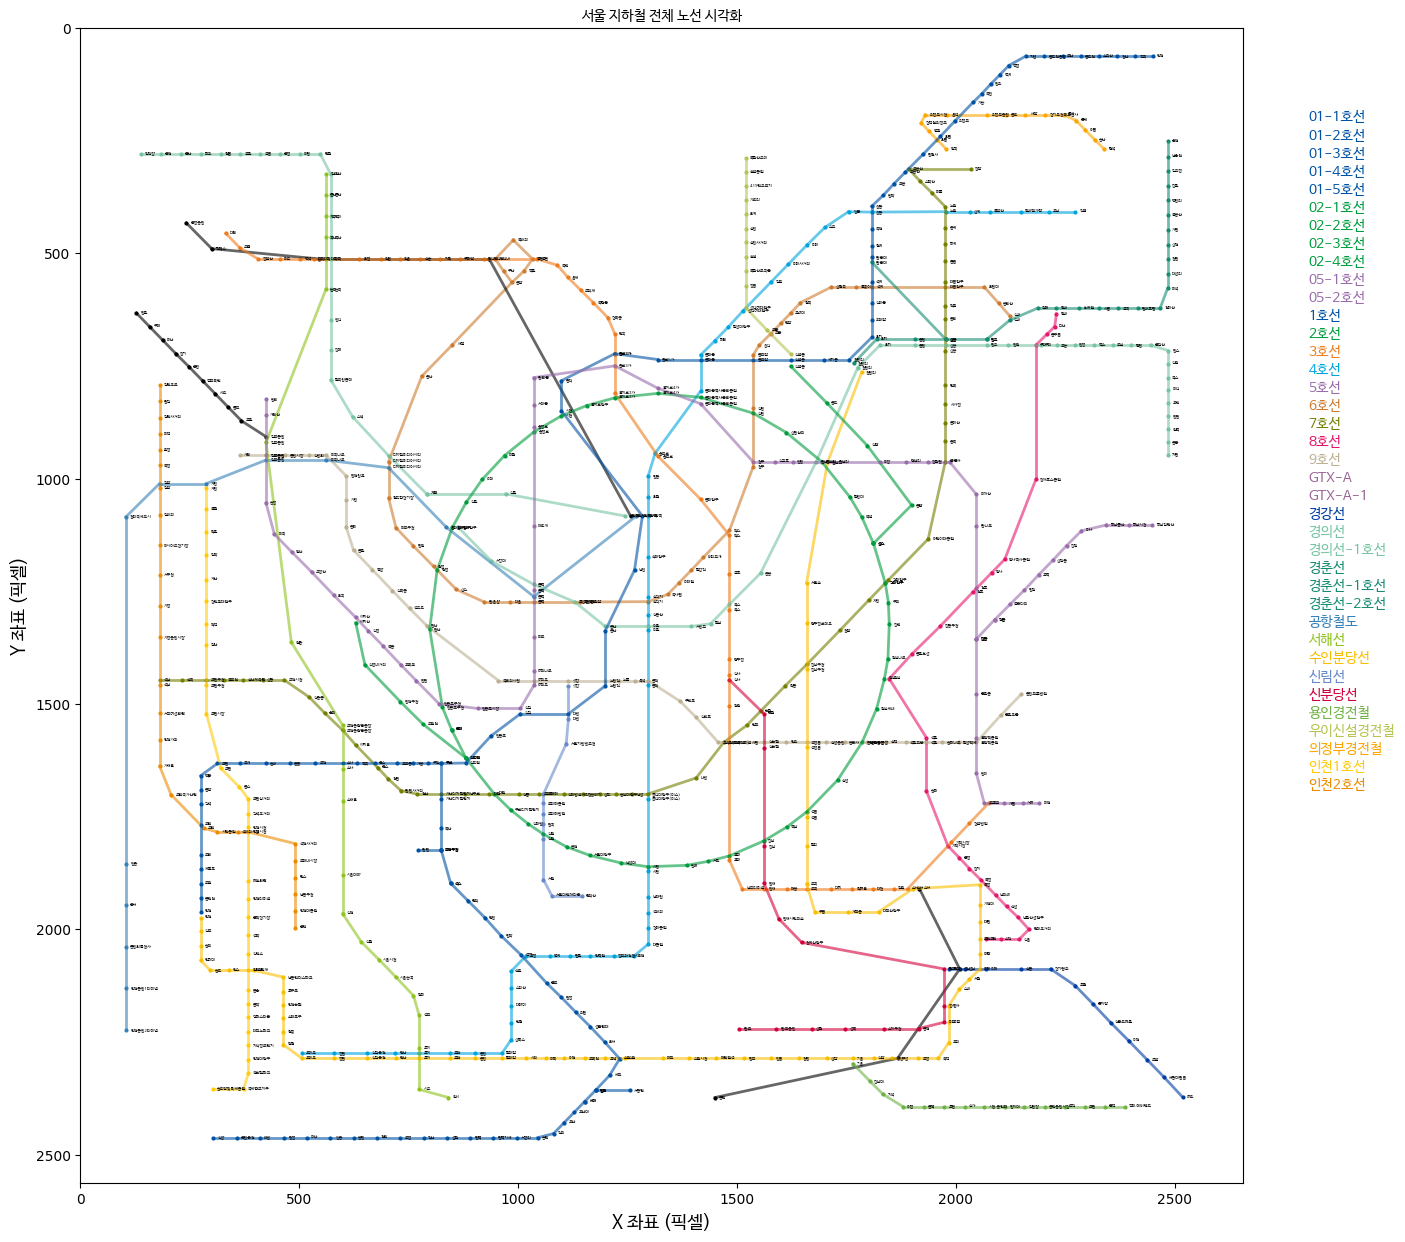

In [37]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import os

# 폰트 설정
font_path = "/root/Metro_Visualization/NanumBarunGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 이미지 크기 설정
image_width = 2656
image_height = 2562

# 노선 색상 매핑
line_colors = {
    "1호선": "#0052A4", "2호선": "#009D3E", "3호선": "#EF7C1C", "4호선": "#00A5DE",
    "5호선": "#996CAC", "6호선": "#CD7C2F", "7호선": "#747F00", "8호선": "#E6186C",
    "9호선": "#BDB092", "경의선": "#77C4A3", "신분당선": "#D4003B", "수인분당선": "#FABE00",
    "공항철도": "#3681B7", "인천1호선": "#FFCA08", "인천2호선": "#ED8B00",
    "의정부경전철": "#FDA600", "용인경전철": "#6FB245", "우이신설경전철": "#B7C452",
    "경춘선": "#178C72", "경강선": "#003DA5", "서해선": "#8FC31F", "신림선": "#6789CA",
    "01-1호선": "#0052A4", "01-2호선": "#0052A4", "01-3호선": "#0052A4", "01-4호선": "#0052A4", "01-5호선": "#0052A4",
    "02-1호선": "#009D3E", "02-2호선": "#009D3E", "02-3호선": "#009D3E", "02-4호선": "#009D3E",
    "05-1호선": "#996CAC", "05-2호선": "#996CAC",
    "경의선-1호선": "#77C4A3", 
    "경춘선-1호선": "#178C72", "경춘선-2호선": "#178C72",
    "GTX-A": "#9A6292", "GTX-A-1": "#9A6292"
}

# 좌표 파일 경로 설정
coordinates_folder = "/root/Metro_Visualization/좌표"
files = [f for f in os.listdir(coordinates_folder) if f.endswith(".txt")]

# 역 데이터 로드 및 그룹화
grouped_stations = {}
for file_name in files:
    line_name = file_name.replace(".txt", "")
    file_path = os.path.join(coordinates_folder, file_name)
    with open(file_path, "r", encoding="utf-8") as file:
        stations = eval(file.read())
        grouped_stations[line_name] = stations

# 외부역코드 정렬을 위한 키 함수
def sort_key(station):
    code = station["외부역코드"]
    if isinstance(code, str):
        parts = code.split('-')
        if not parts[0][0].isdigit():
            main_code = (parts[0][0], int(parts[0][1:]))
        else:
            main_code = ("", int(parts[0]))
        sub_code = int(parts[1]) if len(parts) > 1 else -1
    else:
        main_code = ("", code)
        sub_code = -9
    return (main_code, sub_code)

# 각 노선을 노선명으로 먼저 그룹화하고, 외부역코드 기준으로 정렬
grouped_sorted_stations = {}
for line in grouped_stations:
    grouped_sorted_stations[line] = sorted(grouped_stations[line], key=sort_key)

grouped_stations = grouped_sorted_stations

# 캔버스 준비
fig, ax = plt.subplots(figsize=(15, 15))

# 기존 데이터 범위 설정
ax.set_xlim(0, image_width)
ax.set_ylim(image_height, 0)  # Y축 뒤집기

displayed_coordinates = set()
for line, stations in grouped_stations.items():
    color = line_colors.get(line, "#000000")  # 기존 노선명 그대로 적용

    # 동일한 노선 내의 모든 역을 연결 (서브 노선 포함)
    for i in range(len(stations) - 1):
        station_a = stations[i]
        station_b = stations[i + 1]

        if station_a["노선명"] == station_b["노선명"]:
            ax.plot(
                [station_a["x좌표"], station_b["x좌표"]],
                [station_a["y좌표"], station_b["y좌표"]],
                color=color, linewidth=2, alpha=0.6
            )

    # 역 이름 및 점 표시 (노선 색과 동일한 색상 적용)
    for station in stations:
        coord = (station["x좌표"], station["y좌표"])
        if (coord, station["노선명"]) not in displayed_coordinates:
            ax.scatter(station["x좌표"], station["y좌표"], color=color, s=4)  # 점 색상을 노선 색과 동일하게 설정
            ax.text(
                station["x좌표"] + 10,
                station["y좌표"],
                station["역이름"],
                fontsize=3,
                color="black",
                fontproperties=font_prop,
            )
            displayed_coordinates.add((coord, station["노선명"]))

# 범례 수동 생성 (플롯 오른쪽 외부에 노선명 및 선 색상 표시)
legend_x_offset = 100  # 플롯 오른쪽 외부 X 오프셋
legend_y_start = 200   # 플롯 오른쪽 외부 Y 시작 좌표
legend_y_step = 40     # 각 항목 간의 간격

# 노선명 정렬
sorted_lines = sorted(line_colors.items(), key=lambda x: x[0])

for idx, (line_name, color) in enumerate(sorted_lines):
    y_position = legend_y_start + idx * legend_y_step
    # 선 그리기
    ax.plot(
        [image_width + legend_x_offset, image_width + legend_x_offset + 40],
        [y_position, y_position],
        color=color, linewidth=4, transform=ax.transData
    )
    # 텍스트 추가 (텍스트 색상을 노선 색상과 동일하게 설정)
    ax.text(
        image_width + legend_x_offset + 50, y_position,
        line_name,
        fontsize=10,
        color=color,  # 글씨 색상을 노선 색상과 동일하게 설정
        verticalalignment="center",
        fontproperties=font_prop,
        transform=ax.transData
    )

# 제목과 레이블 설정
ax.set_title("서울 지하철 전체 노선 시각화", fontsize=16, fontproperties=font_prop)
ax.set_xlabel("X 좌표 (픽셀)", fontsize=13, fontproperties=font_prop)
ax.set_ylabel("Y 좌표 (픽셀)", fontsize=13, fontproperties=font_prop)

# 이미지 저장 및 표시
output_path = "/root/Metro_Visualization/전체_노선도_범례_수정.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=False)
plt.show()